In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, rand_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('df_arabica_clean.csv')
#sweetness, defects, clean cup and uniformity all 10 for every row
# df = df.drop(columns=['ICO Number', 'Unnamed: 0', 'ID', 'Sweetness', 'Clean Cup', 'Defects', 'Uniformity'])
df = df.fillna('N/A')
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,N/A,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,N/A,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,N/A,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,N/A,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,N/A,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [35]:
numCountries = len(df['Country of Origin'].value_counts())

flavMetrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
keepCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin']
scoreCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']

df = df[keepCols]

# drop outlier with moisture percentage of 0
# df = df.loc[df['Moisture Percentage'] > 0]

# converts scores out of 10 to 0-1 scale
for i in scoreCols:
    df[i] = df[i].apply(lambda x: x / 10.0)

# converts moisture percentage to 0-1 scale
# df['Moisture Percentage'] = df['Moisture Percentage'].apply(lambda x: x / 100.0)

X = df.drop(columns='Country of Origin')
y = df['Country of Origin']
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Country of Origin
0,0.858,0.850,0.842,0.858,0.825,0.842,Colombia
1,0.850,0.850,0.792,0.800,0.792,0.825,Taiwan
2,0.833,0.842,0.808,0.817,0.792,0.817,Laos
3,0.808,0.817,0.817,0.825,0.817,0.808,Costa Rica
4,0.833,0.833,0.808,0.825,0.792,0.792,Colombia


<Axes: xlabel='Aroma', ylabel='Count'>

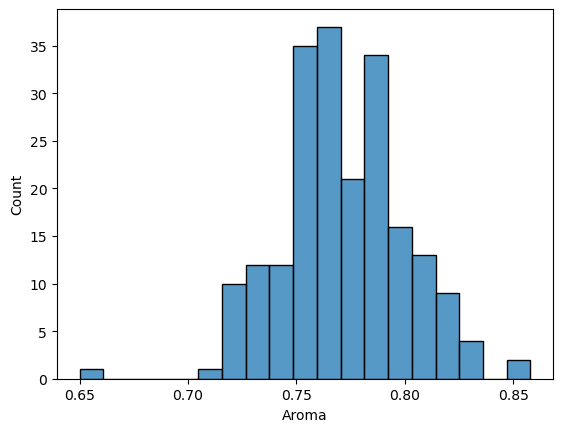

In [36]:
sns.histplot(data=df[scoreCols[0]])

<Axes: xlabel='Flavor', ylabel='Count'>

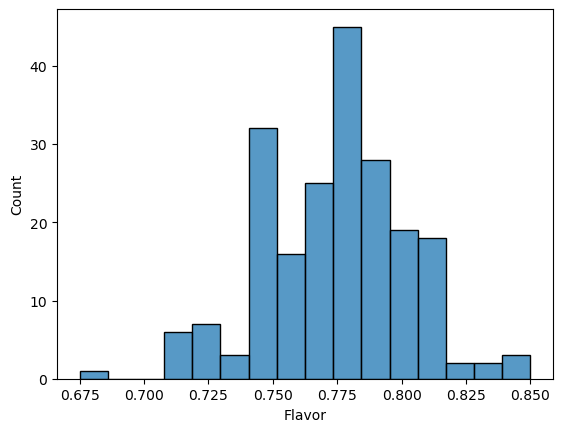

In [37]:
sns.histplot(data=df[scoreCols[1]])

<Axes: xlabel='Aftertaste', ylabel='Count'>

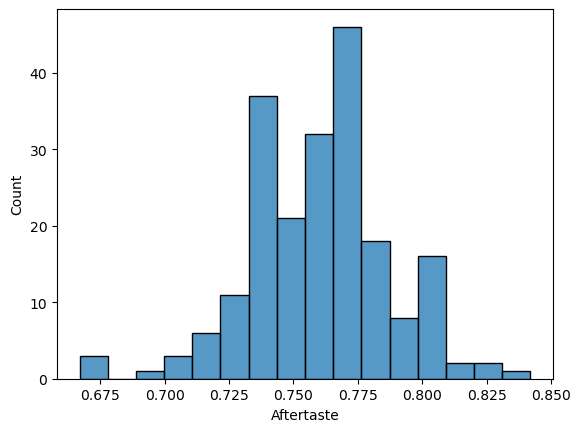

In [38]:
sns.histplot(data=df[scoreCols[2]])

<Axes: xlabel='Acidity', ylabel='Count'>

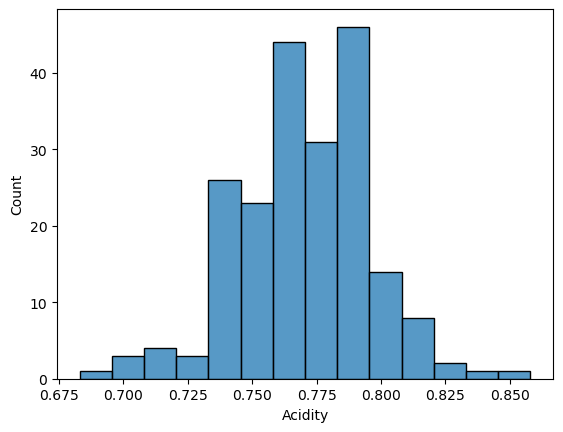

In [39]:
sns.histplot(data=df[scoreCols[3]])

<Axes: xlabel='Body', ylabel='Count'>

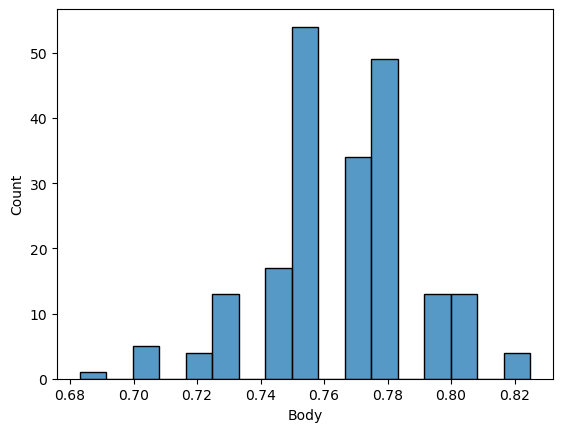

In [40]:
sns.histplot(data=df[scoreCols[4]])

In [41]:
# sns.histplot(data=df['Moisture Percentage'])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/d

2: 0.40056872818221745
3: 0.33122915335261366
4: 0.2984826581267909
5: 0.2693507144487323
6: 0.20406014410462284
7: 0.19587356134098852
8: 0.20415641447832825
9: 0.19496611805329547
10: 0.17460564543180748
11: 0.17699724031085065
12: 0.1590240710132175
13: 0.1908532157306769
14: 0.1851186310425322
15: 0.174932191392105
16: 0.17214201240007898
17: 0.18104406128702777
18: 0.17366930498520636
19: 0.17189020469359326
20: 0.1693346465802844
21: 0.16090080451298103
22: 0.1587734939176828
23: 0.17526850897978336
24: 0.15314240109557717
25: 0.1606251893833362
26: 0.1596351013749328
27: 0.15864376687436466
28: 0.1596017535085573
29: 0.1704852084881471


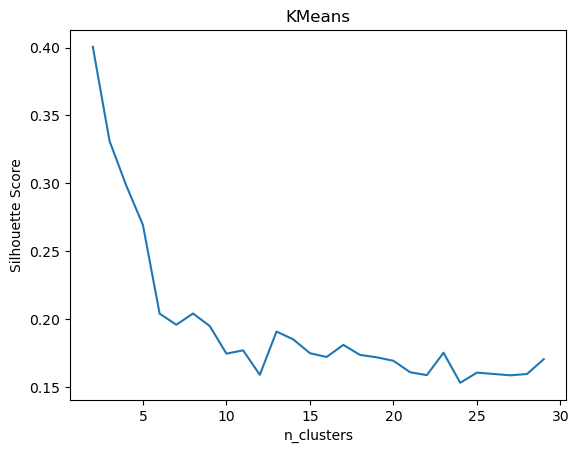

In [43]:
from sklearn.cluster import KMeans
silScores = []
nClusts = []
randScores = []
inertias = []

for i in range(2, 30):
    kmModel = KMeans(n_clusters=i)
    pred = kmModel.fit_predict(X)
    silScores.append(silhouette_score(X, pred))
    randScores.append(rand_score(y, pred))
    nClusts.append(i)
    inertias.append(kmModel.inertia_)

sns.lineplot(x=nClusts, y=silScores).set(title='KMeans', xlabel='n_clusters', ylabel='Silhouette Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {silScores[i]}")
#elbow method suggests about 5 clusters

2: 0.5146569110266873
3: 0.6240326438722387
4: 0.6503447305473476
5: 0.711223676187796
6: 0.7490267811078279
7: 0.776276910088645
8: 0.7716336006753904
9: 0.7877210262182824
10: 0.7960227006237981
11: 0.8054969279114488
12: 0.8138924065475353
13: 0.8040429623376014
14: 0.823132123258759
15: 0.8226161999906195
16: 0.8222409830683364
17: 0.8164251207729468
18: 0.8369213451526664
19: 0.838985038225224
20: 0.8313868955489893
21: 0.8387974297640823
22: 0.8365461282303832
23: 0.8443787814830449
24: 0.8499601332020074
25: 0.8446601941747572
26: 0.8460203555180339
27: 0.8522114347357066
28: 0.8489282866657286
29: 0.8500539374325782


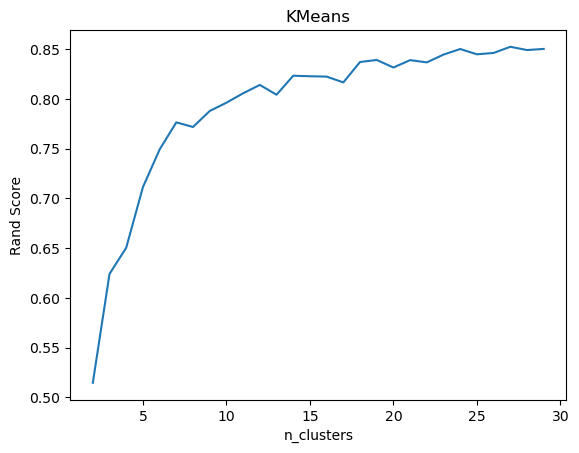

In [44]:
sns.lineplot(x=nClusts, y=randScores).set(title='KMeans', xlabel='n_clusters', ylabel='Rand Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {randScores[i]}")

2: 0.4358547100563912
3: 0.30607926798169144
4: 0.2507209582340195
5: 0.2108601855936065
6: 0.19528955796769493
7: 0.18498985027910686
8: 0.1729234652220184
9: 0.16330679329194858
10: 0.154880759408157
11: 0.1468416943378731
12: 0.14356480074231331
13: 0.13401319292204877
14: 0.1266562744605691
15: 0.1228354211339652
16: 0.1199062897458098
17: 0.11399964460584841
18: 0.11014754535376906
19: 0.1039498068907081
20: 0.10264504936914942
21: 0.09859409859307365
22: 0.09486945842490849
23: 0.09102613824895872
24: 0.09246757945804199
25: 0.08809049866066171
26: 0.08554970701352746
27: 0.08463505960150965
28: 0.08323459520202026
29: 0.0794492908581615


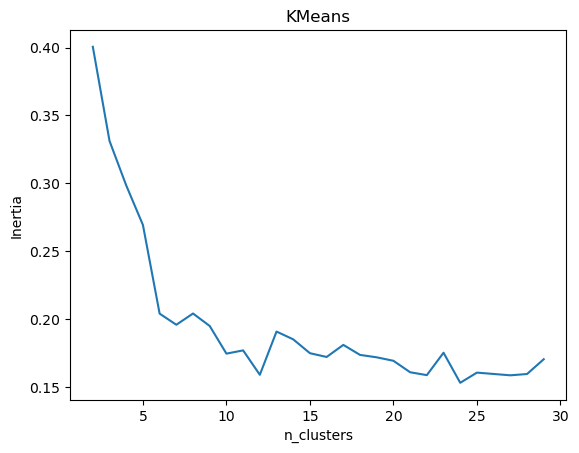

In [45]:
sns.lineplot(x=nClusts, y=silScores).set(title='KMeans', xlabel='n_clusters', ylabel='Inertia')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {inertias[i]}")

In [46]:
from sklearn.cluster import KMeans

kmModel = KMeans(n_clusters=5)

kmModel.fit(X)

print(kmModel.inertia_)

0.2108523192346539


/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

nClusts = []
silScores = []
randScores = []

for i in range(2, 30):
    agg = AgglomerativeClustering(n_clusters=i, metric='euclidean')
    agg.fit(X)
    nClusts.append(i)
    silScores.append(silhouette_score(X, agg.labels_))
    randScores.append(rand_score(y, agg.labels_))


sns.lineplot(x=nClusts, y=silScores).set(title='Agglomerative Clustering', xlabel='n_clusters', ylabel='Silhouette Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {silScores[i]}")

#11 is smallest number of clusters

AttributeError: 'AgglomerativeClustering' object has no attribute 'inertia_'

2: 0.4519956850053937
3: 0.5325266169504245
4: 0.6828947985554148
5: 0.7091599831152385
6: 0.7129121523380705
7: 0.7558744899394962
8: 0.7566249237840627
9: 0.7635195347310164
10: 0.766286759532855
11: 0.7947094413958069
12: 0.8046526898363117
13: 0.8139393086628207
14: 0.819614464612354
15: 0.8198020730734956
16: 0.822897612682332
17: 0.8230852211434736
18: 0.8245860888326063
19: 0.8246329909478918
20: 0.8337320013132592
21: 0.8367337366915248
22: 0.8378593874583744
23: 0.839219548801651
24: 0.8434407391773369
25: 0.8434876412926223
26: 0.8448009005206135
27: 0.8460203555180339
28: 0.8517424135828526
29: 0.8550255616528305


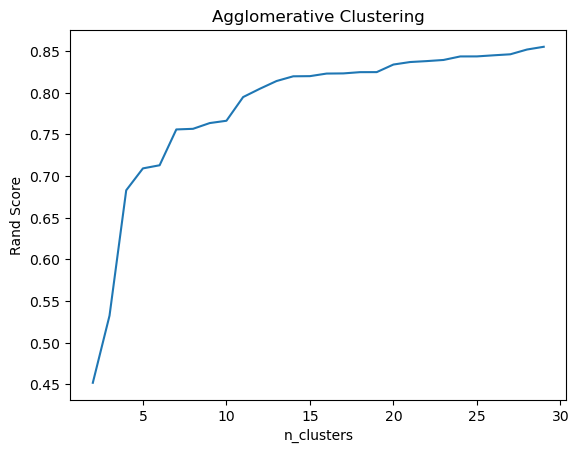

In [48]:
sns.lineplot(x=nClusts, y=randScores).set(title='Agglomerative Clustering', xlabel='n_clusters', ylabel='Rand Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {randScores[i]}")

In [52]:
from sklearn.mixture import GaussianMixture

nComps = []
silScores = []
randScores = []
for i in range(2, 30):
    gmm = GaussianMixture(n_components=i)
    pred = gmm.fit_predict(X)
    silScores.append(silhouette_score(X, pred))
    nComps.append(i)
    randScores.append(rand_score(y, pred))

sns.lineplot(x=nComps, y=silScores).set(title='Gaussian Mixture', xlabel='n_components', ylabel='Silhouette Score')

for i in range(len(nComps)):
    print(f"{nComps[i]}: {silScores[i]}")

AttributeError: 'GaussianMixture' object has no attribute 'inertia_'

2: 0.4032174851085784
3: 0.5314478682988603
4: 0.568875756296609
5: 0.6895548989259416
6: 0.6960273908353267
7: 0.7293278926879603
8: 0.716851930022044
9: 0.7865484733361474
10: 0.7919422165939684
11: 0.7992120444632053
12: 0.7984616106186389
13: 0.8109375732845552
14: 0.7934430842831012
15: 0.8231790253740444
16: 0.817503869424511
17: 0.8188171286525022
18: 0.8289948876694339
19: 0.8287603770930069
20: 0.8376717789972328
21: 0.8435814455231931
22: 0.8396885699545049
23: 0.845223019558182
24: 0.8423150884104873
25: 0.8474743210918813
26: 0.8457858449416069
27: 0.8510388818535716
28: 0.8458796491721776
29: 0.8457389428263214


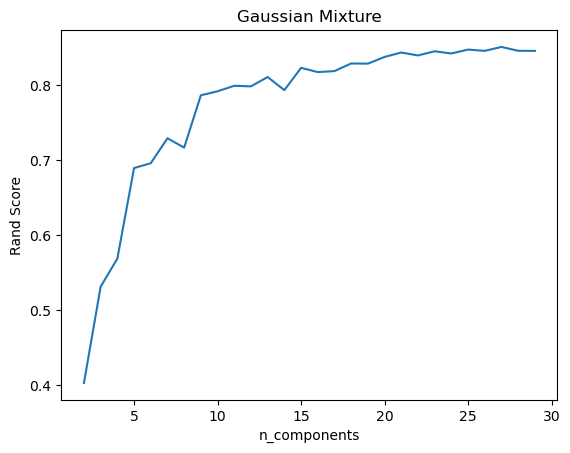

In [50]:
sns.lineplot(x=nComps, y=randScores).set(title='Gaussian Mixture', xlabel='n_components', ylabel='Rand Score')

for i in range(len(nComps)):
    print(f"{nComps[i]}: {randScores[i]}")